# Intro
1. an "adopted user" is defined as a user who has logged into the product on three seperate days in at last one seven-day period.
2. Objective: identify which factors predict future user adoption

## 1 load library and dataset

In [137]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

In [2]:
# load datatset

users_df = pd.read_csv("takehome_users.csv", encoding='latin1')
engagement_df = pd.read_csv("takehome_user_engagement.csv", encoding='latin1')

In [3]:
print(users_df.info())
print(users_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
None
         object_id  last_session_creation_time  opted_in_to_mailing_list  \
count  12000.00000                8.823000e+03              12

In [4]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


## 2 clean the dataset
* create new columns 'invited'. do not care who invited a new user,  
  :: if 'invited_by_user_id' not nan, then set 'invited'=1; else 0
* convert 'last_session_creation_time' to datetime
* if 'last_session_creation_time' is NaN, use creation_time to replace the NaN

#### 2.1. create new column ['invited'] based on 'invited_by_user_id'. If the user was invited by others, then set to 1, otherwise 0

In [5]:
users_df.loc[users_df['invited_by_user_id'].isna(), 'invited'] = 0
users_df.loc[~users_df['invited_by_user_id'].isna(), 'invited'] = 1
users_df[['invited', 'invited_by_user_id']].head()

,invited,invited_by_user_id
0,1.0,10803.0
1,1.0,316.0
2,1.0,1525.0
3,1.0,5151.0
4,1.0,5240.0


### 2.2 deal with 'last_session_creation_time'
1. convert 'last_session_creation_time' to datetime64[s]
2. there is NaN in this column, fill NaN with user's "creation_time"

In [6]:
users_df['last_session_creation_time'] = users_df['last_session_creation_time'].astype('datetime64[s]')
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1.0


In [8]:
users_df[users_df['last_session_creation_time'].isna()].head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,0.0
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270.0,1.0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,NaN,0.0
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,NaN,0.0


In [9]:
users_df.loc[users_df['last_session_creation_time'].isna(), 'last_session_creation_time'] \
  = users_df.loc[users_df['last_session_creation_time'].isna()]['creation_time']
users_df.loc[7:16]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,2013-07-31 05:34:02,1,1,74,NaN,0.0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,2013-11-05 04:04:24,0,0,302,NaN,0.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,1.0
10,11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,2013-12-27 03:55:54,0,0,69,NaN,0.0
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,2014-04-17 23:48:38,0,0,130,9270.0,1.0
12,13,2014-03-30 16:19:38,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,2014-03-30 16:19:38,0,0,254,11204.0,1.0
13,14,2012-10-11 16:14:33,Rivera Bret,BretKRivera@gmail.com,SIGNUP,2012-10-12 16:14:33,0,0,0,NaN,0.0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,2013-07-16 21:33:54,0,0,175,NaN,0.0
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,2013-02-11 10:09:50,0,0,211,NaN,0.0
16,17,2014-04-09 14:39:38,Reynolds Anthony,AnthonyReynolds@jourrapide.com,GUEST_INVITE,2014-04-12 14:39:38,1,0,175,1600.0,1.0


In [97]:
# create new column 'active_duration'
# last_session_creation_time - creation_time = active_duration
users_df['active_duration_days'] = (users_df['last_session_creation_time'].astype('datetime64') \
                               - users_df['creation_time'].astype('datetime64')).dt.days

In [102]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,active_duration_days
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,136
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1.0,5


In [103]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  object 
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  invited                     12000 non-null  float64
 11  active_duration_days        12000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


### 2.3 load engagement
1. load the dataset and inspect the content and info
2. merger the dataset with users_df

In [11]:
print(engagement_df.info())
print(engagement_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
None
             user_id   visited
count  207917.000000  207917.0
mean     5913.314197       1.0
std      3394.941674       0.0
min         1.000000       1.0
25%      3087.000000       1.0
50%      5682.000000       1.0
75%      8944.000000       1.0
max     12000.000000       1.0


In [12]:
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [72]:
engagement_df['date'] = engagement_df['time_stamp'].astype('datetime64').dt.date
engagement_df.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


## 2.4 create new column 'adopted'
1. user who never login the system can be set to 0, not adopted (no login info, so the mergered df show Nan in merged columns)
2. user who loggin system on 3 separate days in at least one seven-day period was considered as adopted, set 1
3. other set to 0

In [76]:
def check_adopted(login_info):
    if len(login_info) < 3:
        return 0

    adopted = 0
    counter = 1
    window = 7
    starter = login_info[0]
    
    for starter in range(len(login_info)):
        counter = 1
        pre = starter
        for index in range(starter+1, len(login_info)):
            if login_info[index] == login_info[pre]:
                pre = index
                continue
            else:
                delta = (login_info[index] - login_info[starter]).days

                if delta <= window:
                    counter += 1
                    if counter >= 3:
                        return 1
                else:
                    break

    return 0

In [78]:
login_info = df.loc[df['object_id'] == 2]['time_stamp'].astype('datetime64').dt.date.values
print(login_info)
t = check_adopted(login_info)
t

[datetime.date(2013, 11, 15) datetime.date(2013, 11, 29)
 datetime.date(2013, 12, 9) datetime.date(2013, 12, 25)
 datetime.date(2013, 12, 31) datetime.date(2014, 1, 8)
 datetime.date(2014, 2, 3) datetime.date(2014, 2, 8)
 datetime.date(2014, 2, 9) datetime.date(2014, 2, 13)
 datetime.date(2014, 2, 16) datetime.date(2014, 3, 9)
 datetime.date(2014, 3, 13) datetime.date(2014, 3, 31)]


1

In [85]:
adopt_dict = []
for id in engagement_df['user_id'].unique():
    login_df = engagement_df.loc[engagement_df['user_id'] == id]['date'].values
    res = check_adopted(login_df)
    adopt_dict.append([id, res])

In [120]:
adopted_df = pd.DataFrame(adopt_dict, columns=['user_id', 'adopted'])
adopted_df.head()

,user_id,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [121]:
# merge adopted_df with user_df
df = pd.merge(users_df, adopted_df, how='left', left_on='object_id', right_on='user_id')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,active_duration_days,user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0,0,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,136,2.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0,0,3.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0,1,4.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1.0,5,5.0,0.0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  object 
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  invited                     12000 non-null  float64
 11  active_duration_days        12000 non-null  int64  
 12  user_id                     8823 non-null   float64
 13  adopted                     882

In [123]:
df.loc[df['adopted'].isna(), 'adopted'] = 0
df[df['adopted'].isna()]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited,active_duration_days,user_id,adopted


In [124]:
cleaned_df = df.drop(['user_id', 
                      'invited_by_user_id', 
                      'object_id', 
                      'creation_time', 
                      'name',
                      'email',
                      'last_session_creation_time'], 
                     axis=1)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  object 
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  invited                     12000 non-null  float64
 11  active_duration_days        12000 non-null  int64  
 12  user_id                     8823 non-null   float64
 13  adopted                     120

In [125]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   invited                     12000 non-null  float64
 5   active_duration_days        12000 non-null  int64  
 6   adopted                     12000 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 750.0+ KB


In [128]:
corr_orig = df.corr()
corr_cleaned = cleaned_df.corr()

Text(0.5, 1.05, 'Correlation Matrix, fontsize=16')

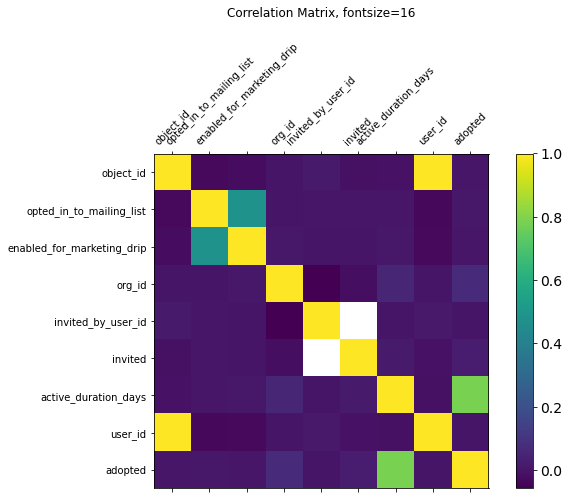

In [134]:
f = plt.figure(figsize=(10,6))
plt.matshow(corr_orig, fignum=f.number)
plt.xticks(range(corr_orig.shape[1]), corr_orig.columns, fontsize=10, rotation=45)
plt.yticks(range(corr_orig.shape[1]), corr_orig.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrix, fontsize=16", loc='center', pad=120)

Text(0.5, 1.05, 'Correlation Matrix with Cleaned Dataset')

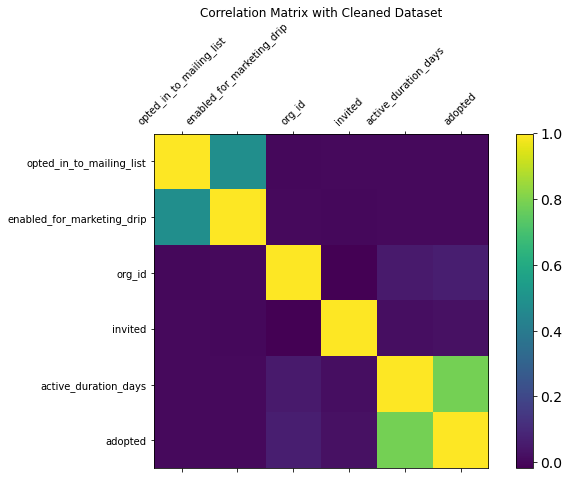

In [135]:
f = plt.figure(figsize=(10, 6))
plt.matshow(corr_cleaned, fignum=f.number)
plt.xticks(range(corr_cleaned.shape[1]), corr_cleaned.columns, fontsize=10, rotation=45)
plt.yticks(range(corr_cleaned.shape[1]), corr_cleaned.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrix with Cleaned Dataset", loc='center', pad=100)

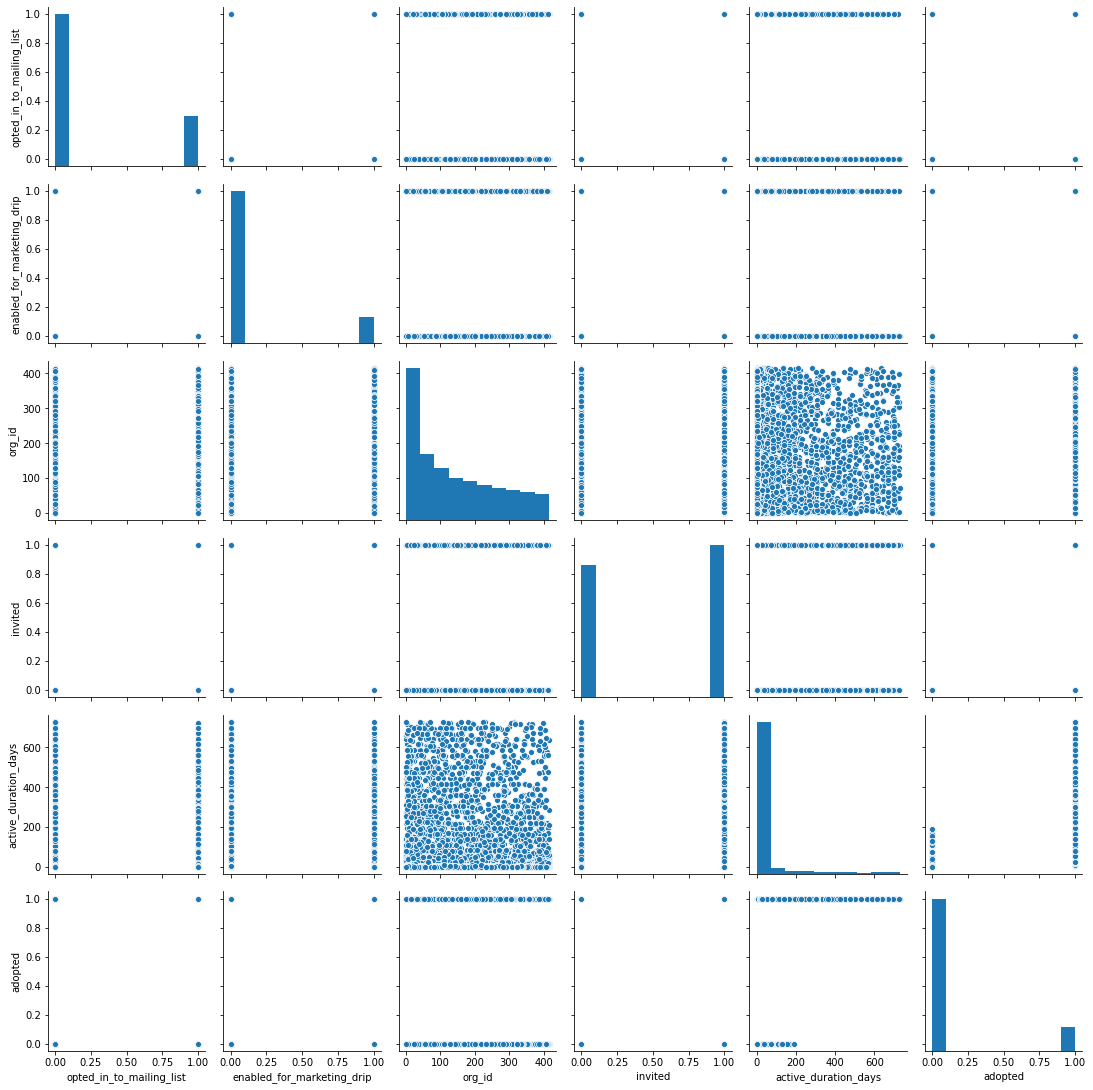

In [138]:
sns.pairplot(cleaned_df)

## 3 identify which factors predict future user adoption

In [235]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [139]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   invited                     12000 non-null  float64
 5   active_duration_days        12000 non-null  int64  
 6   adopted                     12000 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.0+ MB


In [170]:
# define preprocessed columns
categorical_columns = ['creation_source']
numerical_column = ['active_duration_days']
remaining_columns = ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invited', 'org_id']

In [226]:
# with cateforical columns, define transform pipeline
cat_pipe =Pipeline([
    ('ohe', OneHotEncoder())
])

# with numerical columns, define transform pipeline
num_pipe = Pipeline([
    ('scalar', StandardScaler())
])

# combine numerical and categorical transform together
trans_columns = ColumnTransformer([
    ('categorical', cat_pipe, categorical_columns),
    ('numerical', num_pipe, numerical_column)
])

# define direct use columns
direct_access = FunctionTransformer(lambda x: x.loc[:, remaining_columns])

union_trans = FeatureUnion([
    ('transed', trans_columns),
    ('direct', direct_access)
])

input_features = union_trans.fit_transform(cleaned_df)
input_features.shape

(12000, 10)

In [227]:
cat_feature_name = union_trans.transformer_list[0][1].named_transformers_['categorical']['ohe'].get_feature_names()
input_features_name = np.hstack([cat_feature_name, numerical_column, remaining_columns])

In [228]:
rf = RandomForestClassifier()
params = {
    'n_estimators': [3, 5, 7, 10, 20, 30],
    'max_depth': [3, 5, 8, 10, 30, 35]
}
gs = GridSearchCV(rf, params, cv=5, verbose=1)
gs.fit(input_features, cleaned_df['adopted'].values)

feature_importance = pd.DataFrame([np.round(gs.best_estimator_.feature_importances_, 3)],
                                  columns=input_features_name).sort_values(by=0, axis=1, ascending=False)
feature_importance

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    8.0s finished


,active_duration_days,org_id,x0_PERSONAL_PROJECTS,x0_GUEST_INVITE,x0_ORG_INVITE,x0_SIGNUP_GOOGLE_AUTH,opted_in_to_mailing_list,enabled_for_marketing_drip,x0_SIGNUP,invited
0,0.976,0.014,0.006,0.001,0.001,0.001,0.001,0.001,0.0,0.0


In [230]:
# with cateforical columns, define transform pipeline
cat_pipe2 =Pipeline([
    ('ohe', OneHotEncoder())
])


# combine numerical and categorical transform together
trans_columns2 = ColumnTransformer([
    ('categorical', cat_pipe, categorical_columns)
])

# define direct use columns
direct_access2 = FunctionTransformer(lambda x: x.loc[:, remaining_columns])

union_trans2 = FeatureUnion([
    ('transed', trans_columns2),
    ('direct', direct_access2)
])

input_features2 = union_trans2.fit_transform(cleaned_df)
input_features2.shape

(12000, 9)

In [231]:
cat_feature_name2 = union_trans.transformer_list[0][1].named_transformers_['categorical']['ohe'].get_feature_names()
input_features_name2 = np.hstack([cat_feature_name, remaining_columns])

In [234]:
rf = RandomForestClassifier()
params = {
    'n_estimators': [3, 5, 7, 10, 20, 30],
    'max_depth': [3, 5, 8, 10, 30, 35]
}
gs = GridSearchCV(rf, params, cv=5, verbose=1)
gs.fit(input_features2, cleaned_df['adopted'].values)

feature_importance = pd.DataFrame([np.round(gs.best_estimator_.feature_importances_, 3)],
                                  columns=input_features_name2).sort_values(by=0, axis=1, ascending=False)
feature_importance

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   31.2s finished


,org_id,x0_PERSONAL_PROJECTS,x0_SIGNUP_GOOGLE_AUTH,enabled_for_marketing_drip,x0_ORG_INVITE,x0_GUEST_INVITE,x0_SIGNUP,opted_in_to_mailing_list,invited
0,0.631,0.187,0.092,0.046,0.026,0.009,0.008,0.0,0.0


[Text(0.5, 0, 'x0_GUEST_INVITE'),
 Text(1.5, 0, 'x0_ORG_INVITE'),
 Text(2.5, 0, 'x0_PERSONAL_PROJECTS'),
 Text(3.5, 0, 'x0_SIGNUP'),
 Text(4.5, 0, 'x0_SIGNUP_GOOGLE_AUTH'),
 Text(5.5, 0, 'active_duration_days'),
 Text(6.5, 0, 'opted_in_to_mailing_list'),
 Text(7.5, 0, 'enabled_for_marketing_drip'),
 Text(8.5, 0, 'invited'),
 Text(9.5, 0, 'org_id')]

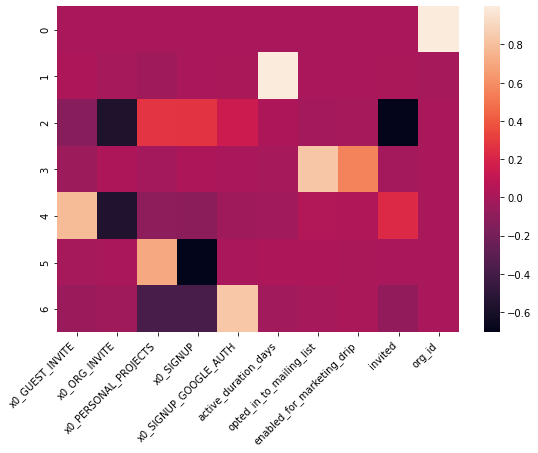

In [240]:
pca =PCA(n_components=7)
pca.fit_transform(input_features)
pca_feature = pd.DataFrame(pca.components_, columns=input_features_name)
pca_feature
plt.figure(figsize=(9,6))
chart = sns.heatmap(pca_feature)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

## Report

1. According to the experiment, if we can get "active_duration_days" feature (last_session_creation_time - creation_time = active_duration), we could easily conclude the result, the longer the "active_duration_days", the higher probability the user will adopted.
2. The correlation matrix also show the same result.
3. if it's hard to get the "active_duration_days", you can choose "org_id" as a indexer to illustrate the prossibility of user adoption.
4. According to PCA analysis, we can find out the same result. Also we can infer that both "active_duration_days" and "org_id" have positive relationship with user adoption.
5. 